In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(784,))
img_inputs = keras.Input(shape=(32, 32, 3))

In [3]:
print(img_inputs.shape)
print(type(img_inputs))

(None, 32, 32, 3)
<class 'keras.engine.keras_tensor.KerasTensor'>


In [4]:
print(inputs.shape)
print(type(inputs))

(None, 784)
<class 'keras.engine.keras_tensor.KerasTensor'>


# Functional Way to Define Model

In [5]:
inputs = keras.Input(shape=(784,))

In [6]:
#Defining a Graph Layer(Defining one layer)
dense1 = layers.Dense(64, activation="relu")

In [7]:
x = dense1(inputs)

In [8]:
dense2 = layers.Dense(64, activation ="relu")

In [9]:
x = dense2(x)

In [10]:
outputs = layers.Dense(10)

In [11]:
outputs = outputs(x)

In [12]:
model_1 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [13]:
model_1.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


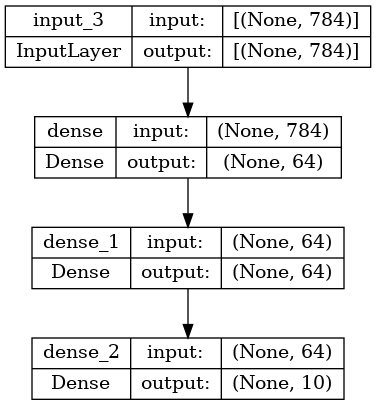

In [14]:
keras.utils.plot_model(model_1, "my_first_model.png", show_shapes = True)

# Another Approach

In [15]:
inputs = keras.Input(shape=(784,))

In [16]:
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [17]:
model_2 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [18]:
model_2.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


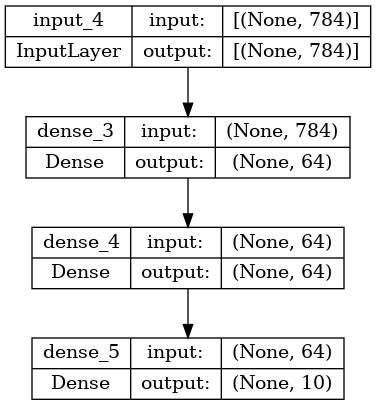

In [19]:
keras.utils.plot_model(model_2, "my_first_model.png", show_shapes = True )

# Train Evaluate Inference

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model_1.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model_1.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model_1.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 1s 1ms/step - loss: 0.3373 - accuracy: 0.9061 - val_loss: 0.1913 - val_accuracy: 0.9448
Epoch 2/2
750/750 [==============================] - 1s 1ms/step - loss: 0.1562 - accuracy: 0.9534 - val_loss: 0.1599 - val_accuracy: 0.9537
313/313 - 0s - loss: 0.1550 - accuracy: 0.9519 - 177ms/epoch - 566us/step
Test loss: 0.15496572852134705
Test accuracy: 0.9519000053405762


# Auto Encoder

In [21]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

# Ensemble Method

In [22]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
# Averaging 3 models output
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 model (Functional)             (None, 1)            129         ['input_8[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 1)            129         ['input_8[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 1)            129         ['input_8[0][0]']                
                                                                                            

# Complex Graph

In [23]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, None)]       0           []                               
                                                                                                  
 body (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 64)     640000      ['title[0][0]']                  
                                                                                                  
 embedding_1 (Embedding)        (None, None, 64)     640000      ['body[0][0]']                   
                                                                                            

In [24]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

In [25]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")


print(title_data[0])
print(body_data[0])
print(tags_data[0])


# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

[5170 9346 2427 3756 7184 6331 3965 1601 8577 8505]
[3478 4987 9919 1258 5164 3125  973 1779 5177 2410 9298 3067 7799 1846
 4489 9179 5454 1927  495 1104 3743 5118 1330 4324 1530 1098  565  401
 3598 9260  486 2835 2641 1716 1647 3189 9902 1602 4936 6601 5632 8503
 9153 1190  786 7353 5964 8269 5710 7998  926 3982 2196 8911 9422 2291
 1374 2573 1351 5016  110 4321 1553 3317 8366 2754 7423 6709 8185 9831
 7902 4266 4305 6269 6976   87 7573 6291 3839 5455 5700 4837 9734  908
 8896  218 5562 6850 9696 5856 3936 3037 3525 7136 6999 7503 6009 5187
 2251 5331]
[0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
Epoch 1/2
40/40 [==============================] - 3s 17ms/step - loss: 1.2958 - priority_loss: 0.7306 - department_loss: 2.8263
Epoch 2/2
40/40 [==============================] - 1s 20ms/step - loss: 1.2639 - priority_loss: 0.7002 - department_loss: 2.8186


# Toy Resnet

In [26]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(64, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 30, 30, 64)   1792        ['img[0][0]']                    
                                                                                                  
 conv2d_5 (Conv2D)              (None, 28, 28, 64)   36928       ['conv2d_4[0][0]']               
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_5[0][0]']               
                                                                                         

In [27]:
features_list = [layer.output for layer in model.layers]
print(features_list)

[<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'img')>, <KerasTensor: shape=(None, 30, 30, 64) dtype=float32 (created by layer 'conv2d_4')>, <KerasTensor: shape=(None, 28, 28, 64) dtype=float32 (created by layer 'conv2d_5')>, <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'conv2d_6')>, <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'conv2d_7')>, <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'add')>, <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'conv2d_8')>, <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'conv2d_9')>, <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'add_1')>, <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'conv2d_10')>, <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'global_average_pooling

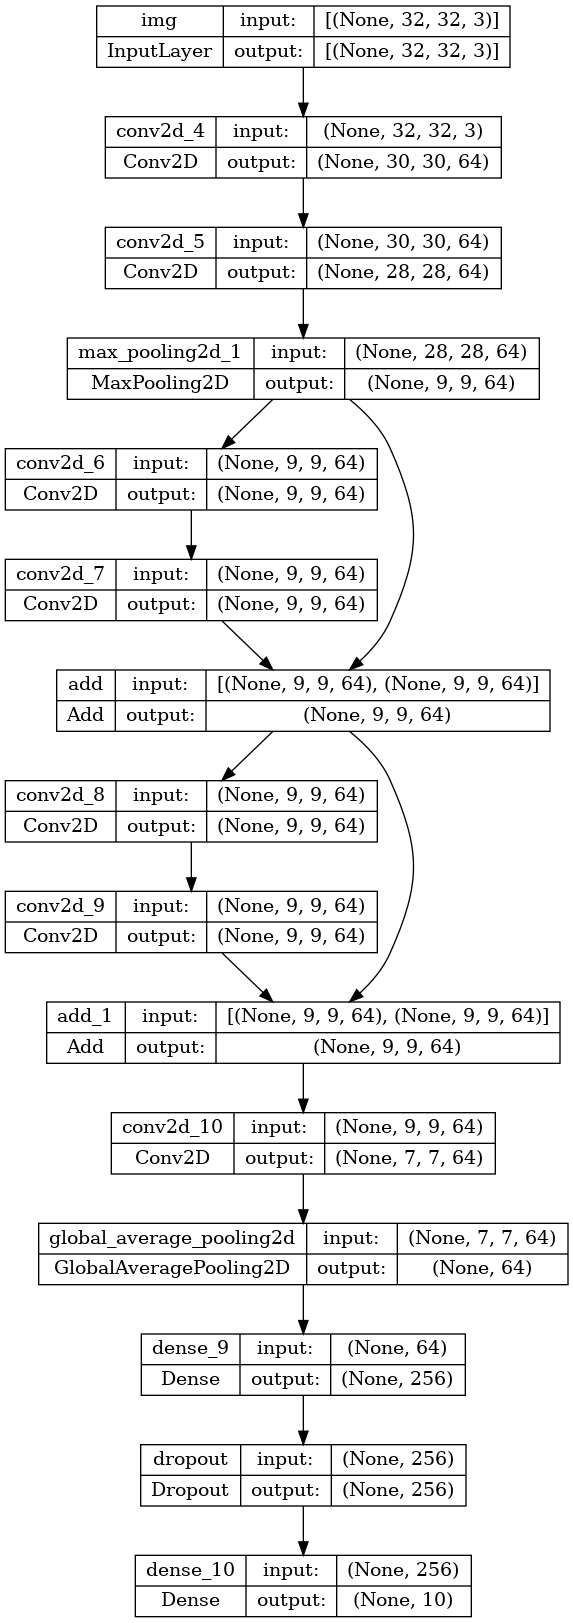

In [28]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [29]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 2s 77ms/step - loss: 2.3085 - acc: 0.1088 - val_loss: 2.3363 - val_acc: 0.1000


# Extract and reuse nodes in the graph of layers

In [30]:
vgg19 = tf.keras.applications.VGG19()

574710816/574710816 [==============================] - 209s 0us/step


In [31]:
features_list = [layer.output for layer in vgg19.layers]

In [32]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)

In [55]:
for i in range(len(features_list)):
    print(extracted_features[i].shape)
    print(features_list[i])

(1, 224, 224, 3)
KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_9'), name='input_9', description="created by layer 'input_9'")
(1, 224, 224, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 64), dtype=tf.float32, name=None), name='block1_conv1/Relu:0', description="created by layer 'block1_conv1'")
(1, 224, 224, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 64), dtype=tf.float32, name=None), name='block1_conv2/Relu:0', description="created by layer 'block1_conv2'")
(1, 112, 112, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 64), dtype=tf.float32, name=None), name='block1_pool/MaxPool:0', description="created by layer 'block1_pool'")
(1, 112, 112, 128)
KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 128), dtype=tf.float32, name=None), name='block2_conv1/Relu:0', description="created by layer 'block2_conv1'")
(1, 112, 112, 128)
KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 128), dtype=tf.f

# Custom Layer (example of creating dense)

In [79]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units
        print(self.units)
    def build(self, input_shape):
        print(self.units)
        print(input_shape[-1])
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)
model.summary()

10
10
4
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 4)]               0         
                                                                 
 custom_dense_11 (CustomDens  (None, 10)               50        
 e)                                                              
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [78]:
# v = np.random.rand(2,3,4)
# print(v[0])
# print(v.shape[-1])
# print(v.shape[1])
# n = v.reshape((-1,1))
# print(n)
# print(n.shape)

[[0.5990404  0.83300792 0.24778207 0.91554059]
 [0.72008566 0.81812153 0.40535312 0.98254128]
 [0.95399101 0.21420567 0.68238731 0.96118795]]
4
3
[[0.5990404 ]
 [0.83300792]
 [0.24778207]
 [0.91554059]
 [0.72008566]
 [0.81812153]
 [0.40535312]
 [0.98254128]
 [0.95399101]
 [0.21420567]
 [0.68238731]
 [0.96118795]
 [0.02939839]
 [0.84582817]
 [0.35725577]
 [0.47790101]
 [0.31100223]
 [0.89307153]
 [0.97352964]
 [0.07082488]
 [0.6093281 ]
 [0.44473809]
 [0.52950353]
 [0.62588994]]
(24, 1)
